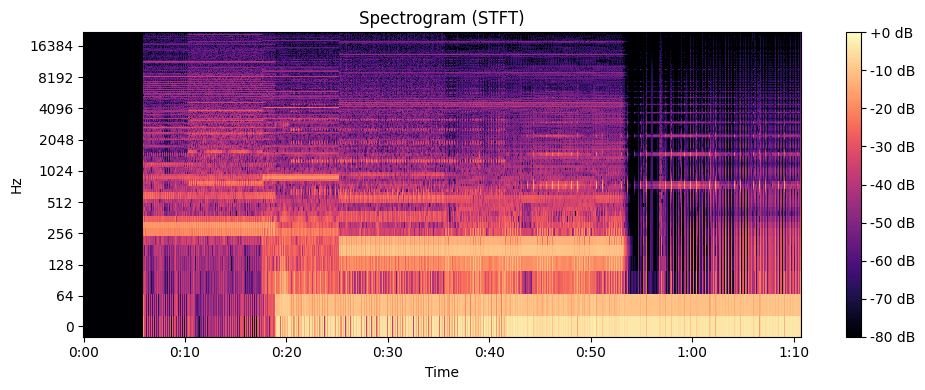

In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# load the audio file
filename = 'data/2025_07.wav'
signal, sr = librosa.load(filename, sr=None)

# STFT parameters
FFTwindow = 1000
hop = FFTwindow
window_fn = 'hann'

def compute_stft(sig):
    return np.abs(librosa.stft(sig, n_fft=FFTwindow, hop_length=hop, window=window_fn))

# create spectrogram
spectrogram = compute_stft(signal)

# show the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max),
                         sr=sr, hop_length=hop, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (STFT)')
plt.tight_layout()
plt.show()


In [3]:

# Compute MFCCs
mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)

# Compute recurrence matrix
recurrence = librosa.segment.recurrence_matrix(mfcc, mode='affinity')

# Compute novelty function
novelty = librosa.onset.onset_strength(S=recurrence, sr=sr)

# Detect peaks in novelty
peaks = librosa.util.peak_pick(novelty, pre_max=5, post_max=5, pre_avg=5, post_avg=5, delta=0.2, wait=10)


In [7]:
recurrence

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40990362],
       [0.        , 0.        , 0.        , ..., 0.        , 0.40990362,
        0.        ]])

In [8]:
onset_frames = librosa.onset.onset_detect(y=signal, sr=sr, hop_length=hop)
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop)


In [9]:
onset_frames

array([ 257,  260,  269,  278,  287,  303,  327,  336,  360,  376,  385,
        387,  401,  416,  425,  434,  897,  911,  914,  923,  939,  955,
        964, 1005, 1033, 1046, 1071, 1124, 1143, 1152, 1162, 1165, 1171,
       1184, 1193, 1206, 1209, 1212, 1234, 1259, 1275, 1278, 1287, 1300,
       1303, 1322, 1328, 1344, 1385, 1397, 1410, 1416, 1438, 1447, 1463,
       1479, 1488, 1504, 1529, 1545, 1551, 1570, 1579, 1586, 1592, 1595,
       1598, 1604, 1611, 1617, 1626, 1633, 1639, 1642, 1648, 1661, 1664,
       1670, 1683, 1686, 1692, 1705, 1714, 1727, 1730, 1736, 1752, 1758,
       1780, 1793, 1802, 1805, 1818, 1824, 1827, 1910, 1921, 1930, 1932,
       1957, 2148, 2339, 2358, 2360, 2362, 2366, 2371, 2373, 2380, 2382,
       2384, 2386, 2390, 2393, 2399, 2401, 2406, 2408, 2410, 2412, 2414,
       2419, 2421, 2423, 2430, 2432, 2438, 2443, 2445, 2447, 2452, 2456,
       2458, 2462, 2466, 2469, 2471, 2473, 2475, 2477, 2484, 2488, 2490,
       2495, 2499, 2501, 2503, 2508, 2512, 2517, 25

In [10]:
onset_times

array([ 5.8276644 ,  5.89569161,  6.09977324,  6.30385488,  6.50793651,
        6.8707483 ,  7.41496599,  7.61904762,  8.16326531,  8.5260771 ,
        8.73015873,  8.7755102 ,  9.09297052,  9.43310658,  9.63718821,
        9.84126984, 20.34013605, 20.65759637, 20.72562358, 20.92970522,
       21.29251701, 21.6553288 , 21.85941043, 22.78911565, 23.42403628,
       23.71882086, 24.28571429, 25.48752834, 25.91836735, 26.12244898,
       26.34920635, 26.41723356, 26.55328798, 26.84807256, 27.0521542 ,
       27.34693878, 27.41496599, 27.4829932 , 27.98185941, 28.54875283,
       28.91156463, 28.97959184, 29.18367347, 29.47845805, 29.54648526,
       29.97732426, 30.11337868, 30.47619048, 31.40589569, 31.67800454,
       31.97278912, 32.10884354, 32.60770975, 32.81179138, 33.17460317,
       33.53741497, 33.7414966 , 34.10430839, 34.67120181, 35.03401361,
       35.17006803, 35.60090703, 35.80498866, 35.96371882, 36.09977324,
       36.16780045, 36.23582766, 36.37188209, 36.53061224, 36.66

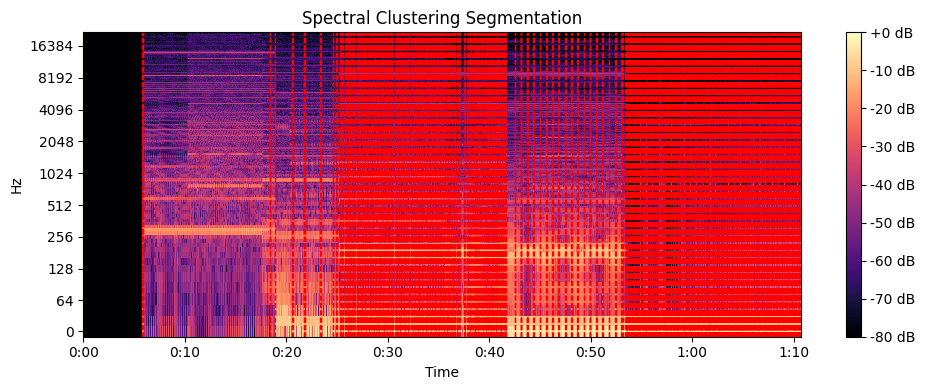

In [13]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load audio
y, sr = librosa.load('data/2025_07.wav', sr=None)

# Extract MFCCs
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfcc = mfcc.T  # Transpose to shape (frames, features)

# Apply KMeans clustering
n_segments = 7  # Choose number of segments
kmeans = KMeans(n_clusters=n_segments, random_state=0).fit(mfcc)
labels = kmeans.labels_

# Find change points
boundaries = np.flatnonzero(np.diff(labels))  # Indices where cluster label changes
times = librosa.frames_to_time(boundaries, sr=sr)

# Plot segmentation
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max),
                         sr=sr, hop_length=512, x_axis='time', y_axis='log')
for t in times:
    plt.axvline(x=t, color='r', linestyle='--', linewidth=1)
plt.title('Spectral Clustering Segmentation')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
